In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Create synthetic data representing model behavior over time
np.random.seed(42)
data = pd.DataFrame({
    "feature1": np.random.randn(300),
    "feature2": np.random.randn(300),
    "drift_flag": [0]*200 + [1]*100  # 0=normal, 1=drift
})
data["target"] = np.where(data["drift_flag"]==0,
                          (data["feature1"] + data["feature2"] > 0).astype(int),
                          (data["feature1"] - data["feature2"] > 0).astype(int))
data.head()


,feature1,feature2,drift_flag,target
0,0.496714,-0.828995,0,0
1,-0.138264,-0.560181,0,0
2,0.647689,0.747294,0,1
3,1.523030,0.610370,0,1
4,-0.234153,-0.020902,0,0


In [2]:
X = data[["feature1", "feature2"]]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy before drift:", accuracy_score(y_test, y_pred))


Accuracy before drift: 0.8


Accuracy after drift: 0.8222222222222222


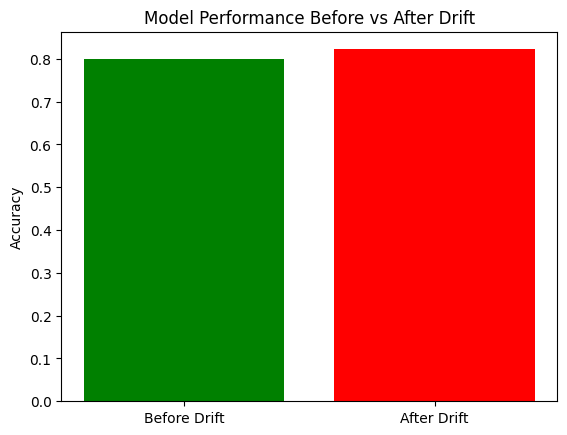

In [3]:
# Generate new data to simulate operational environment shift
X_drift = X_test.copy()
X_drift["feature1"] = X_drift["feature1"] * 1.5 + np.random.randn(len(X_drift)) * 0.2

y_drift_pred = model.predict(scaler.transform(X_drift))
print("Accuracy after drift:", accuracy_score(y_test, y_drift_pred))

# Visualize performance comparison before and after drift
plt.bar(["Before Drift", "After Drift"],
        [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_drift_pred)],
        color=["green", "red"])
plt.title("Model Performance Before vs After Drift")
plt.ylabel("Accuracy")
plt.show()
